# INDIAN START-UP ECOSYSTEM PROJECT

## Business Understanding

In this project, I am going to focus on the details of funding for these start-ups in India, where I will dive deep into a data containing all the details about fundings received by the start-ups, from 2018 to 2021 and communicate my findings and recommendations to the team in the best way possible.

Some hypotheses I will be testing for this project are as follows;
I will be getting deep into Hypothesis testing later in the project (Outlining the Null and Alternate Hypotheses)

1. Companies with multiple founders are likely to receive higher amounts of funding in India.

2. Sector of the start-up contributes to funding amount.

3. Startup headquarters/location contributes to funding amount.

4. The number of investors affect the funding amount.




I will be focusing on answering the following  business questions:

### Yearly Analysis

- what is the overall trend in funding amounts over the specified time period? 
   - Average and Total funding amount per year
   - Which year had the highest total and average funding amount?

### Analysis by Sector 

- What are the top 5 and botton 5 start-ups according to funding amount and Which sectors are they from?

- Total and Average funding amount by sectors during this timeframe
   - Which sectors has the highest total and average funding during this timeframe?
   - Which sectors has the lowest total and average funding during this timeframe?

- What is the number of fundings by sectors?

### Analysis by location/region

- Total and average funding amounts by locations during this timeframe
   - Which regions have the highest total and average funding during this timeframe?
   - Which regions have the lowest total and average funding during this timeframe?

- What is the number of fundings for each region?

### Analysis by Stages

- Is there a relationship between the development Stage of the startup and the funding it received?

- What is the average number of fundings for each stage?

- What is the average funding amount for each stage?

- What is the Total funding amount per each stage?

### Founder-based Analysis

- How many founders are associated with each company?

- Is there a relationship between the number of founders and the funding amount received?

### Installing the needed libraries

Fisrt I go ahead to install all the required libraries

In [145]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

### Initializing environment variables

To connect to one of the data sources(a database) I'll be working with, I need some credentials (username, password etc.) which cannot be shared or cannot be shown to the public, therefore I need to create a .env file which is going to house the environment variables. This environment variable will be used in creating a connection string to help connect to the database.

In [146]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
login=environment_variables.get("LOGIN")
password=environment_variables.get("PASSWORD")

# creating connection to database
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"

In [147]:
# Using the connect method of the pyodbc library, I go ahead to pass in the connection string.
# This will connect to the server

connection=pyodbc.connect(connection_string)

## Data Understanding

The data for this project will be extracted from 3 different sources, as funding data for 2020 and 2021 are hosted on an SQL Server database, funding data for 2018 is hosted in a Github repository and 2019's funding data is hosted on a OneDrive.

First, I connect to the database to see the tables contained in it. I then go ahead to extract the data for 2020 and 2021 by assigning them appropriate variable names.

Data hosted on Github and OneDrive were downloaded to my local storage and then read in from there. 2018's data as a CSV file while data for 2019 is an excel file.

below are the common fields/columns for 2019, 2020 and 2021 and their descriptions

| Field           | Description                                                     |
|-----------------|-----------------------------------------------------------------|
| Company_Brand   | Name of start-up company                                        |
| Founded         | Year it was founded                                             |
| HeadQuarter     | Headquarters or location of the company                         |
| Sector          | Sector of the company                                           |
| What_it_does    | A brief description of what the company does                    |
| Founders        | Name(s) of the founder(s) of the company                        |
| Investor        | Name(s) of the investor(s) of the company                       |
| Amount          | Amount invested into the company by investor(s)                 |
| Stage           | Current stage of the startup (e.g. Pre-seed, Pre-series, Series A, Series D) |


2018 had different column names but most had the same meaning as the columns for 2019, 2020 and 2021

| Field           | Description                                                     |
|-----------------|-----------------------------------------------------------------|
| Company Name    | Name of start-up company                                        |
| Industry        | Sector of the company                                           |
| Round/Series    | Current stage of the startup                                    |
| Amount          | Amount invested into the company by investor(s)                 |
| Location        | Headquarters or location of the company                         |
| About Company   | A brief description of what the company does                    |            



A year column will be later added to data during data preparation. Now Because 2019,2020 and 2020 have similar or the same columns, columns for 2018 will changed to look just like the other 3 so as to make concatenation easy. The columns for the other 3 might also be tweaked to meet the requirements.



In [148]:
# Let's see have a look at the tables in the database
query = ''' SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE' '''

tables=pd.read_sql(query,connection)
print(tables)


  TABLE_CATALOG TABLE_SCHEMA               TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  LP1_startup_funding2021  BASE TABLE
1         dapDB          dbo  LP1_startup_funding2020  BASE TABLE






As seen above, the database contains two tables namely LP1_startup_funding2020 which contains data for 2020 and then LP1_startup_funding2021 which contains data for 2021.

Now I will go ahead to read the data into pandas dataframe separately and assign them to variable names which are self-descriptive

#### Reading data for all years into pandas dataframe separately

In [149]:

#first we assign the data for 2020 to a variable 'data_2020'

query="Select * from dbo.LP1_startup_funding2020"
data_2020=pd.read_sql(query,connection)

data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [150]:
#then assign the data for 2021 to a variable 'data_2021'

query="Select * from dbo.LP1_startup_funding2021"
data_2021=pd.read_sql(query,connection)

data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


Since, data for 2020 and 2021 has almost the same columns, I will focus on making changes to them and merging them for the mean time.

In [151]:
# first add the year for both dataframes
data_2020['Year']=2020
data_2021['Year']=2021

df_20_21=pd.concat([data_2020, data_2021], ignore_index=True)

Now since I have concatenated the data for 2020 and 2021, I will go ahead to make sure the column names for both 2018 and 2019 are the same so theyt can also be concatenated to the data

In [152]:
# reading in data for 2018
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv'
data_2018 = pd.read_csv(url, on_bad_lines='skip')
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [153]:
# reading in data for 2019

# URL for the raw CSV file
url = 'https://raw.githubusercontent.com/richmond-yeboah/Indian-Start-up-Ecosystem-Project/main/Data/startup_funding2019.csv'
data_2019 = pd.read_csv(url, encoding='latin1', on_bad_lines='skip')
data_2019.head()


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [154]:
# creating a 'Founded', 'Founders', and 'Year' column for 2018
data_2018['Founded']= np.nan 
data_2018['Founders']= np.nan 
data_2018['Year']=2018

# Renaming 2018 column names
data_2018= data_2018.rename(columns={'Company Name': 'Company_Brand'})
data_2018= data_2018.rename(columns={'Industry': 'Sector'})
data_2018= data_2018.rename(columns={'Location': 'HeadQuarter'})
data_2018= data_2018.rename(columns={'Round/Series': 'Stage'})
data_2018= data_2018.rename(columns={'About Company': 'What_it_does'})

# Add a year column for 2018
data_2019['Year']=2019

# Renaming 2018 column names
data_2019= data_2019.rename(columns={'Company/Brand': 'Company_Brand'})
data_2019= data_2019.rename(columns={'What it does': 'What_it_does'})
data_2019= data_2019.rename(columns={'Amount($)': 'Amount'})

df = pd.concat([df_20_21, data_2018, data_2019], ignore_index=True)
df

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020
...,...,...,...,...,...,...,...,...,...,...,...
2874,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A,NaN,2019
2875,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN,NaN,2019
2876,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B,NaN,2019
2877,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN,NaN,2019


### Exploratory Data Analysis

Now since all  4 dataset has been concatenated, I will go ahead to explore the data, check the data quality and make sure to clean it before I dive into my analysis.

#### Summary Statistics

In [155]:
df.describe()

,Founded,Year
count,2110.000000,2879.000000
mean,2016.079621,2020.023619
std,4.368006,1.086974
min,1963.000000,2018.000000
25%,2015.000000,2020.000000
50%,2017.000000,2020.000000
75%,2019.000000,2021.000000
max,2021.000000,2021.000000


### Overview of the dataframe and missing values

In [156]:

print(f'{df.info()}\n\nmissing values\n------------------------------\n{df.isna().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   column10       2 non-null      object 
 10  Year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB
None

missing values
------------------------------
Company_Brand       0
Founded           769
HeadQuarter       114
Sector             18
What_it_does        0
Founders          545
Investor          626
Amount            257
Stage             938
column1

In [157]:
# before I dive deep into exploring and cleaning the data, I will drop the 'column10' column
df.drop(columns=['column10'], inplace=True)
df.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Year'],
      dtype='object')

### Checking for Duplicates and dropping them

In [158]:
# checking for duplicates
df.duplicated().sum()

23

In [159]:
# dropping duplicates
df.drop_duplicates(inplace=True)

# check if duplicates were dropped
df.duplicated().sum()

0

### Feature Engineering

In this section, I will be dropping some columns since I won't be focusing on them, but before I drop them I will add my new columns first since I might need them to create my new columns. Since my interest lies in the number of investors and the number of founders rather than their names, I will add two columns containing how many they are and drop them.

In [160]:
def how_many(x):
    # if x is an empty value return 'NaN'
    if pd.isna(x)==True:
        return np.nan
    #else if x is not empty and there's no comma in x (meaning a single value) return 1
    elif (pd.isna(x)==False) & (',' not in x):
        return 1
    # Otherwise, count the number of investors by splitting on commas
    else:
        return len(x.split(',')) if x else 0

In [161]:
# Add the new columns
df['Num_of_Investors'] = df['Investor'].apply(how_many)
df['Num_of_Founders'] = df['Founders'].apply(how_many)

df[['Investor','Num_of_Investors', 'Founders', 'Num_of_Founders']]

,Investor,Num_of_Investors,Founders,Num_of_Founders
0,Angel investors,1.0,"Prasanna Manogaran, Bharani C L",2.0
1,GSF Accelerator,1.0,"Saurabh Dixit, Gurudutt Upadhyay",2.0
2,Venture Center,1.0,Ajinkya Dhariya,1.0
3,"Venture Catalysts, PointOne Capital",2.0,Ritesh Tiwari,1.0
4,"Siana Capital Management, Info Edge",2.0,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...",4.0
...,...,...,...,...
2874,"Tiger Global, Nexus Venture Partners, Accel Pa...",4.0,"Aaditya Sharda, Souvik Sengupta",2.0
2875,"MyPreferred Transformation, Avendus Finance, S...",3.0,Ritesh Agarwal,1.0
2876,Sequoia Capital,1.0,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",4.0
2877,"Norwest Venture Partners, General Catalyst, Fu...",4.0,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...",4.0


In [162]:
# Now drop those 2 columns and the 'Founded' column too which contains the year the start-up was founded
df.drop(columns=['Investor', 'Founders', 'Founded'], inplace=True)

In [163]:
df.isna().sum()

Company_Brand         0
HeadQuarter         114
Sector               18
What_it_does          0
Amount              256
Stage               929
Year                  0
Num_of_Investors    624
Num_of_Founders     544
dtype: int64

### Dealing with missing values, inconsistencies and invalid entries

Now in this section, I am going to get rid of missing values by using the appropriate central tendency value(mean, median, mode) to fill in or by dropping. Also, I will go further into looking at them closely before taking any actions and this going to be done, column by column.

#### Cleaning the 'HeadQuarter' Column

In [164]:
df['HeadQuarter'].head(10)

0      Chennai
1    Bangalore
2         Pune
3    New Delhi
4       Indore
5    Bangalore
6    Hyderabad
7      Gurgaon
8    Bangalore
9         Pune
Name: HeadQuarter, dtype: object

In [165]:
pd.DataFrame(df['HeadQuarter'].unique()).head(50)

,0
0,Chennai
1,Bangalore
2,Pune
3,New Delhi
4,Indore
5,Hyderabad
6,Gurgaon
7,Belgaum
8,Noida
9,Mumbai


This column contains a lot of inconsistencies, some examples are
- Incorrect city names (wrong spellings)
- Having the country attached to it (Trivandrum, Kerala, India)
- Missing values

In [166]:
# replace "Bengaluru" with "Bangalore" in the "headquarter" column
df['HeadQuarter'] = df['HeadQuarter'].str.replace('Bengaluru', 'Bangalore')
df['HeadQuarter'] = df['HeadQuarter'].str.replace('Bangalore City', 'Bangalore')
df['HeadQuarter'] = df['HeadQuarter'].str.replace('New Delhi', 'Delhi')
df['HeadQuarter'] = df['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

In [167]:
# list of some values in the 'HeadQuarter' column that will be replaced
cities_to_replace = ["Tirunelveli, Tamilnadu", "Frisco, Texas, United States", "Dhingsara, Haryana", "New York, United States",
"Jaipur, Rajastan", "Jaipur, Rajastan", "San Francisco, California, United States", "San Francisco, United States", 
 "San Ramon, California", "Paris, Ile-de-France, France", "Plano, Texas, United States",
"San Francisco Bay Area, Silicon Valley,West Coast", "London, England, United Kingdom", "Sydney, New South Wales, Australia", 
"Milano, Lombardia, Italy", "New York, United States", "Palmwoods, Queensland, Australia", "London, England, United Kingdom", 
"San Francisco Bay Area, West Coast, Western US", "Trivandrum, Kerala, India", "Samastipur, Bihar",
"Irvine, California, United States", "Tumkur, Karnataka", "San Francisco Bay Area, Silicon Valley, West Coast", 
"San Francisco, California, United States", "Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom", "Shanghai, China", 
"Jiaxing, Zhejiang, China", "Tangerang, Jawa Barat, Indonesia"]


# list of city names they will be replaced with
new_cities = ['Tamilnadu', 'Texas', 'Haryana', 'New York', 'Rajastan', 'Rajastan', 'San Francisco', 'San Francisco', 
'San Ramon', 'Paris', 'Texas', 'San Francisco', 'London', 'Sydney', 'Milano', 'New York', 'Queensland', 'London', 
'San Francisco', 'Kerala', 'Biphar', 'California', 'Karnataka', 'San Francisco', 'San Francisco', 'Newcastle', 'Shanghai', 
'Jiaxing', 'Jawa Barat']

for city, new_city in zip(cities_to_replace, new_cities):
    df['HeadQuarter'] = df['HeadQuarter'].apply(lambda x: new_city if city in str(x) else x)

In [168]:
# check the unique values again
df['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'Delhi', 'Indore', 'Hyderabad',
       'Gurugram', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tamilnadu', 'Thane', None, 'Singapore',
       'Gujarat', 'Haryana', 'Kerala', 'Jodhpur', 'Rajastan', 'Texas',
       'California', 'New York', 'Patna', 'San Francisco', 'San Ramon',
       'Paris', 'Sydney', 'Bangaldesh', 'London', 'Milano', 'Queensland',
       'France', 'Cochin', 'Biphar', 'Karnataka', 'Newcastle', 'Shanghai',
       'Jiaxing', 'Kochi', 'Ludhiana', 'Dehradun', 'San Franciscao',
       'Jawa Barat', 'Berlin', 'Seattle', 'Riyadh', 'Seoul', 'Bangkok',
       'Kanpur', 'Chandigarh', 'Warangal', 'Hyderebad', 'Odisha', 'Bihar',
       'Goa', 'Tamil Nadu', 'Uttar Pradesh', 'Bhopal', 'Banglore',
       'Coimbatore', 'Ahmadabad', 'Small Towns, Andhra Pradesh',
       'Rajsamand', 'Ranchi', 'Faridabad, Haryana', 'Computer Games',
       'Vadodara', 'Food & Beverages', 'Pharmaceuticals\t#REF!',
       'Guru

Still contain values that are not supposed to be there

In [169]:
# replacing invalid values
df['HeadQuarter'] = df['HeadQuarter'].replace('Food & Beverages', np.nan)
df['HeadQuarter'] = df['HeadQuarter'].replace('Pharmaceuticals\t#REF!', np.nan)
df['HeadQuarter'] = df['HeadQuarter'].replace('Online Media#REF!', np.nan)
df['HeadQuarter'] = df['HeadQuarter'].replace('Gurugram\t#REF!', 'Gurugram')
df['HeadQuarter'] = df['HeadQuarter'].replace('Information Technology & Services', 'Manchester')
df['HeadQuarter'] = df['HeadQuarter'].replace('Mountain View, CA', 'California')
df['HeadQuarter'] = df['HeadQuarter'].replace('Faridabad, Haryana', 'Haryana')
df['HeadQuarter'] = df['HeadQuarter'].replace('Small Towns, Andhra Pradesh', 'Andhra Pradesh')

In [170]:
df['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'Delhi', 'Indore', 'Hyderabad',
       'Gurugram', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tamilnadu', 'Thane', None, 'Singapore',
       'Gujarat', 'Haryana', 'Kerala', 'Jodhpur', 'Rajastan', 'Texas',
       'California', 'New York', 'Patna', 'San Francisco', 'San Ramon',
       'Paris', 'Sydney', 'Bangaldesh', 'London', 'Milano', 'Queensland',
       'France', 'Cochin', 'Biphar', 'Karnataka', 'Newcastle', 'Shanghai',
       'Jiaxing', 'Kochi', 'Ludhiana', 'Dehradun', 'San Franciscao',
       'Jawa Barat', 'Berlin', 'Seattle', 'Riyadh', 'Seoul', 'Bangkok',
       'Kanpur', 'Chandigarh', 'Warangal', 'Hyderebad', 'Odisha', 'Bihar',
       'Goa', 'Tamil Nadu', 'Uttar Pradesh', 'Bhopal', 'Banglore',
       'Coimbatore', 'Ahmadabad', 'Andhra Pradesh', 'Rajsamand', 'Ranchi',
       'Computer Games', 'Vadodara', nan, 'Mohali', 'Powai', 'Ghaziabad',
       'Nagpur', 'West Bengal', 'Samsitpur', 'Lucknow', 'Telang

There are values like 'Lucknow, Uttar Pradesh, India' that need to be changed, and I am going to do this by only taking the first value after splitting

In [171]:
# a function to split it if there's a comma in the row and pick just the first value after splitting
def pick_first(x):
    if ',' in x:
        return x.split(',')[0]
    else:
        return x

In [172]:
df['HeadQuarter'] = pick_first(df['HeadQuarter'])

# now take another look at the unique values
df['HeadQuarter']

0         Chennai
1       Bangalore
2            Pune
3           Delhi
4          Indore
          ...    
2874       Mumbai
2875     Gurugram
2876        Delhi
2877        Delhi
2878    Rajasthan
Name: HeadQuarter, Length: 2856, dtype: object

In [173]:
# now dealing with missing values
df['HeadQuarter'].isna().sum()

116

In [174]:
# Since that column is ideally an object data type, I will go ahead and fill with the mode
df['HeadQuarter'] = df['HeadQuarter'].fillna(df['HeadQuarter'].mode()[0])

#### Cleaning the 'Sector' column

First we have a look at the missing values in the column and the unique values

In [175]:
df['Sector'].isna().sum()

18

This column definitely has issues that have to be dealt with, some of these issues are

- Range of values to wide and diverse
- Double Sectors
- dash entries ('-')
- missing values

Looking at the unique values, there are no missing values because they have been replaced with 'Others'. Now I will go ahead and have a look at the 'Others' and see if I can manually input them

In [176]:
import re

# Define your lists of substrings
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est = ['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']
auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']
style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos = ['Hospitality','Hotel','Leisure']

# Create a dictionary to map categories to their lists
categories = {
    'Tech': tech,
    'Finance': fin,
    'FinTech': fint,
    'Health': health,
    'Marketing': mkt,
    'Agriculture': agric,
    'Consumer': con,
    'E-Commerce': econ,
    'Consulting': cons,
    'Education': edu,
    'Wellness': welln,
    'Real Estate': real_est,
    'Logistics': log,
    'Automotive': auto,
    'Manufacturing': manu,
    'Energy': ener,
    'Media': medi,
    'Gaming': game,
    'Fashion': style,
    'Hospitality': hos
}

# Sort the categories based on the length of the substrings in descending order
sorted_categories = {
    category: sorted(substrings, key=len, reverse=True)
    for category, substrings in categories.items()
}

# Function to categorize a given string
def categorize_string(s):
    for category, substrings in sorted_categories.items():
        pattern = re.compile('|'.join(map(re.escape, substrings)), re.IGNORECASE)
        if pattern.search(s):
            return category
    return 'Uncategorized'


In [177]:
df['Sector'] = df['Sector'].apply(lambda x: str(x))

In [178]:
df['new_sector'] = df['Sector'].apply(categorize_string)

In [179]:
df['new_sector'].unique()

array(['Tech', 'Health', 'Finance', 'Uncategorized', 'Consumer',
       'E-Commerce', 'Gaming', 'Logistics', 'Automotive', 'Energy',
       'Media', 'Real Estate', 'Wellness', 'Consulting', 'Fashion',
       'Agriculture', 'Manufacturing', 'Education', 'FinTech'],
      dtype=object)

In [180]:
# now check how many of them are not categorized
df.loc[df['new_sector'] == 'Uncategorized']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year,Num_of_Investors,Num_of_Founders,new_sector
9,Gig India,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,1000000.0,Pre-series A,2020,2.0,2.0,Uncategorized
23,Awign Enterprises,Bangalore,Work fulfillment,Operations and manpower outsourcing startup,500000.0,None,2020,2.0,3.0,Uncategorized
95,Pravasirojgar,Bangalore,Job portal,Initiative for blue-collar job workers,33000000.0,None,2020,1.0,1.0,Uncategorized
97,Awign,Bangalore,Job portal,Operations and manpower outsourcing startup,NaN,Pre-series B,2020,2.0,3.0,Uncategorized
328,Reliance,Mumbai,Multinational conglomerate company,Reliance owns businesses across India engaged ...,2200000000.0,None,2020,4.0,1.0,Uncategorized
...,...,...,...,...,...,...,...,...,...,...
2839,Awign Enterprises,Bangalore,nan,It supplies workforce to the economy,"$4,000,000",Series A,2019,4.0,3.0,Uncategorized
2842,TapChief,Bangalore,nan,It connects individuals in need of advice in a...,"$1,500,000",Pre series A,2019,1.0,3.0,Uncategorized
2843,eJOHRI,Mumbai,Jewellery,Omnichannel marketplace for gems and jewellery,"$1,000,000",Pre series A,2019,1.0,2.0,Uncategorized
2846,KredX,Bangalore,nan,Invoice discounting platform,"$26,000,000",Series B,2019,1.0,1.0,Uncategorized


now I will go ahead an rename the drop the 'Sector' column and have the 'new_sector' column changed to 'Sector'

In [181]:
# drop the old sector
df.drop(columns=['Sector'], inplace=True)

In [182]:
df.rename(columns={ 'new_sector': 'Sector'}, inplace=True)

In [183]:
df.head()

,Company_Brand,HeadQuarter,What_it_does,Amount,Stage,Year,Num_of_Investors,Num_of_Founders,Sector
0,Aqgromalin,Chennai,Cultivating Ideas for Profit,200000.0,None,2020,1.0,2.0,Tech
1,Krayonnz,Bangalore,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed,2020,1.0,2.0,Tech
2,PadCare Labs,Pune,Converting bio-hazardous waste to harmless waste,NaN,Pre-seed,2020,1.0,1.0,Health
3,NCOME,Delhi,Escrow-as-a-service platform,400000.0,None,2020,2.0,1.0,Finance
4,Gramophone,Indore,Gramophone is an AgTech platform enabling acce...,340000.0,None,2020,2.0,4.0,Tech


#### Cleaning the 'Amount' Column

In [184]:
df['Amount'].unique()

array([200000.0, 100000.0, nan, 400000.0, 340000.0, 600000.0, 45000000.0,
       1000000.0, 2000000.0, 1200000.0, 660000000.0, 120000.0, 7500000.0,
       5000000.0, 500000.0, 3000000.0, 10000000.0, 145000000.0,
       100000000.0, 21000000.0, 4000000.0, 20000000.0, 560000.0, 275000.0,
       4500000.0, 15000000.0, 390000000.0, 7000000.0, 5100000.0,
       700000000.0, 2300000.0, 700000.0, 19000000.0, 9000000.0,
       40000000.0, 750000.0, 1500000.0, 7800000.0, 50000000.0, 80000000.0,
       30000000.0, 1700000.0, 2500000.0, 40000.0, 33000000.0, 35000000.0,
       300000.0, 25000000.0, 3500000.0, 200000000.0, 6000000.0, 1300000.0,
       4100000.0, 575000.0, 800000.0, 28000000.0, 18000000.0, 3200000.0,
       900000.0, 250000.0, 4700000.0, 75000000.0, 8000000.0, 121000000.0,
       55000000.0, 3300000.0, 11000000.0, 16000000.0, 5400000.0,
       150000000.0, 4200000.0, 22000000.0, 52000000.0, 1100000.0,
       118000000.0, 1600000.0, 18500000.0, 70000000000.0, 800000000.0,
       4000

There are a lot of inconsistencies in the column, some examples are;

- missing values
- currency mix-up
- figures without currencies
- invalid entries(Seed, $, Undisclosed)

In [185]:
# first convert every value in the 'Amount' column to string so string function can be run on it
df['Amount'] = df['Amount'].apply(lambda x: str(x))

# Write a function that determines currency
def determine_currency(value):
    if '$' in value:
        return 'Dollars'
    elif '₹' in value:
        return 'Rupees'
    else:
        return np.nan

# Add new column 'Currency' by applying the function to 'Amount'
df['Currency'] = [determine_currency(value) for value in df['Amount']]

In [186]:
# The below function takes in an argument 'amt'

def clean_amount(amt):
    if pd.isnull(amt) or amt in ['—', 'Seed', '$', 'Undisclosed', 'undisclosed']:
        return np.nan
    elif isinstance(amt, str):
        if '$' in amt:
            # Remove any non-numeric characters and return the numeric part
            return ''.join(filter(str.isdigit, amt))
        elif '₹' in amt:
            # Convert to dollars with the appropriate exchange rate
            return str(round(float(amt.replace('₹', '').replace(',', '')) / 68.41, 2))
    try:
        # Convert to float and then to string
        return str(float(amt))
    except ValueError:
        return np.nan

In [187]:
# Apply the function to amount
df['new_amount'] = df['Amount'].apply(clean_amount)

In [188]:
# Convert to numeric, forcing errors to NaN
df['new_amount'] = pd.to_numeric(df['new_amount'], errors='coerce')


In [189]:
# check for empty values in the 'new_amount' column
df['new_amount'].isna().sum()

563

Before I go ahead and impute the missing values, I must check the distribution and boxplot of the 'new_amount' column for outliers and choose the appropriate central tendency value to impute with

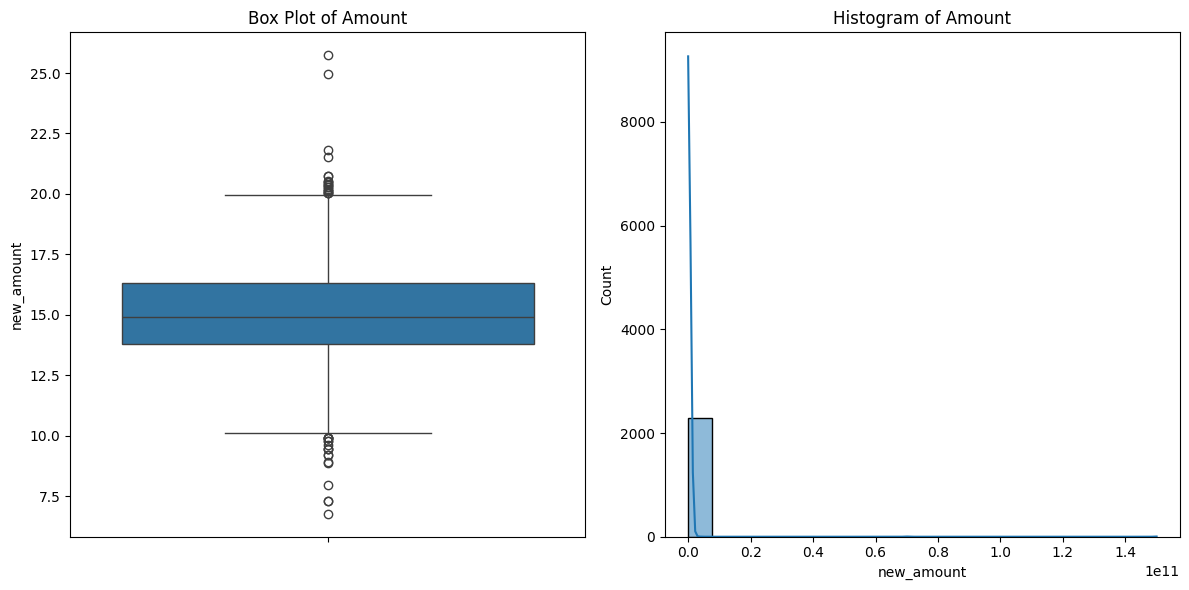

In [190]:
# Create a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a box plot on the first axis
sns.boxplot(data=np.log1p(df['new_amount']), ax=axes[0])
axes[0].set_title('Box Plot of Amount')

# Plot a histogram on the second axis
sns.histplot(data=df['new_amount'], bins=20, ax=axes[1], kde=True)  # kde=True adds a kernel density estimate line
axes[1].set_title('Histogram of Amount')

# Adjust layout
plt.tight_layout()

# show plot
plt.show()

As seen from the two plots, there are outliers in the 'new_amount' column therefore it wise to use the median as it is immune to outliers as compared to the mean

In [191]:
df['new_amount'] = df['new_amount'].fillna(df['new_amount'].median())

#### Cleaning the 'Stage' column

In [192]:
df['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', '$1200000', 'Seed+',
       'Series F2', 'Series A+', 'Series G', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', '$300000', 'Early seed', '$6000000',
       '$1000000', 'Seies A', 'Series A2', 'Series I', 'Angel',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt'

As seen there a lot of invalid values that need to be taken care of

In [193]:
# list of valid development stages of start-ups
valid_stages = ['Venture - Series Unknown','Seed', 'Angel', 'Series A', 'Series B', 'Pre-Seed', 'Grant', 'Series H', 
                'Series A', 'Series C', 'Series E', 'Corporate Round','Series D','Debt financing','Post-IPO Equity']

# if the value in 'Stage' is not one of the values in the valid_stages list, return null value for that row
df.loc[~df['Stage'].isin(valid_stages), 'Stage'] = np.nan

In [194]:
# Number of missing values in the 'Stage' column
df['Stage'].isna().sum()

1526

In [195]:
# fill in with the mode

df['Stage'].fillna(df['Stage'].mode()[0], inplace=True)

In [196]:
df.head()

,Company_Brand,HeadQuarter,What_it_does,Amount,Stage,Year,Num_of_Investors,Num_of_Founders,Sector,Currency,new_amount
0,Aqgromalin,Chennai,Cultivating Ideas for Profit,200000.0,Seed,2020,1.0,2.0,Tech,NaN,200000.0
1,Krayonnz,Bangalore,An academy-guardian-scholar centric ecosystem ...,100000.0,Seed,2020,1.0,2.0,Tech,NaN,100000.0
2,PadCare Labs,Pune,Converting bio-hazardous waste to harmless waste,nan,Seed,2020,1.0,1.0,Health,NaN,3000000.0
3,NCOME,Delhi,Escrow-as-a-service platform,400000.0,Seed,2020,2.0,1.0,Finance,NaN,400000.0
4,Gramophone,Indore,Gramophone is an AgTech platform enabling acce...,340000.0,Seed,2020,2.0,4.0,Tech,NaN,340000.0


In [197]:
df.isna().sum()

Company_Brand          0
HeadQuarter            0
What_it_does           0
Amount                 0
Stage                  0
Year                   0
Num_of_Investors     624
Num_of_Founders      544
Sector                 0
Currency            1440
new_amount             0
dtype: int64

#### Cleaning 'Num_of_Investors' Column

This is one of the columns added to the original dataset. Due to the missing values in the column used to create this new column, there are some missing values that need to be filled in, but before I will have a look at the distribution of this column.

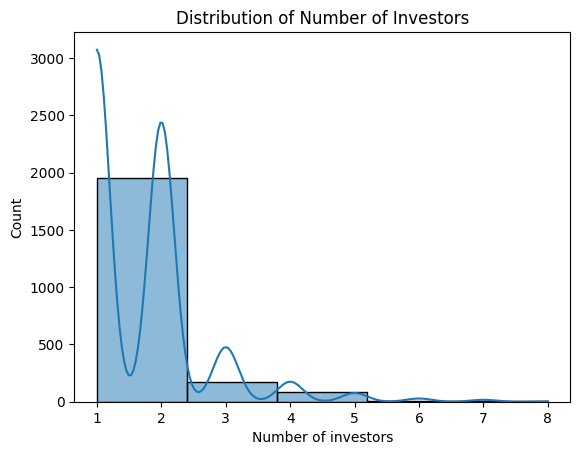

In [198]:
# Plotting the distribution of this column
sns.histplot(df['Num_of_Investors'], bins=5, kde=True)
plt.title('Distribution of Number of Investors')
plt.xlabel('Number of investors')
plt.show()

Due to it's skewness, it is advisable to use a central tendency value which is immune to skewness and outliers.

In [199]:
# impute with the median
df['Num_of_Investors'].fillna(df['Num_of_Investors'].median(), inplace=True)

In [200]:
# recheck for any missing values
df['Num_of_Investors'].isna().any()

False

#### Cleaning 'Num_of_Founders' Column

I will go ahead and do same like I did for the previous one

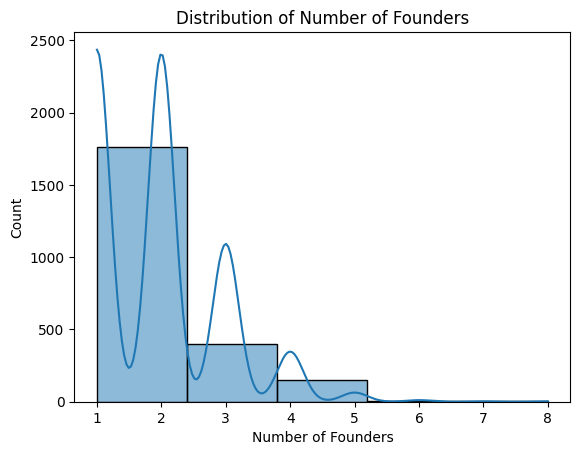

In [201]:
# Plotting the distribution of this column
sns.histplot(df['Num_of_Founders'], bins=5, kde=True)
plt.title('Distribution of Number of Founders')
plt.xlabel('Number of Founders')
plt.show()

In [202]:
# impute with the median
df['Num_of_Founders'].fillna(df['Num_of_Founders'].median(), inplace=True)